In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import make_blobs
from scipy.interpolate import griddata 

In [2]:
# Gradient 1
g1nutrient_data = pd.read_csv('Grad1Nutrients.csv')
g1_metals = pd.read_csv('Grad1TraceMetals.csv')

# Gradient 2
g2nutrient_data = pd.read_csv('Grad2Nutrients.csv')
g2_metals = pd.read_csv('Grad2TraceMetals.csv')

# Gradient 3 
g3nutrient_data = pd.read_csv('Grad3Nutrients.csv')
g3_metals = pd.read_csv('Grad3TraceMetals.csv')

In [3]:
# rounding the nutrient lats in g1, g2, and g3
g1_round_lat = g1nutrient_data['lat'].round()
g1nutrient_data.insert(2, 'rlat', g1_round_lat)

g2_round_lat = g2nutrient_data['lat'].round()
g2nutrient_data.insert(2, 'rlat', g2_round_lat)

g3_round_lat = g3nutrient_data['lat'].round()
g3nutrient_data.insert(2, 'rlat', g3_round_lat)

C:\Users\User\AppData\Local\Temp\ipykernel_15516\446644369.py:1: RuntimeWarning: divide by zero encountered in log
  g1_no2_no3 = np.log(g1nutrient_data['NO3_NO2'].to_list())


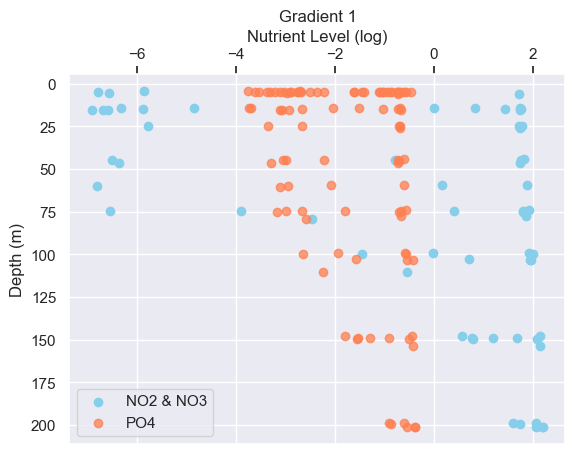

In [4]:
g1_no2_no3 = np.log(g1nutrient_data['NO3_NO2'].to_list())
g1_po4 = np.log(g1nutrient_data['PO4'].to_list())
g1nutrient_depth = g1nutrient_data['depth'].to_list()
g1nutrient_lat = g1nutrient_data['lat'].to_list()

plt.scatter(g1_no2_no3, g1nutrient_depth, alpha = 1.0, color = 'skyblue', label = 'NO2 & NO3')
plt.scatter(g1_po4, g1nutrient_depth, alpha = 0.75, color = 'coral', label = 'PO4')
plt.xlabel('Nutrient Level (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 1')
plt.gca().invert_yaxis()
plt.legend()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

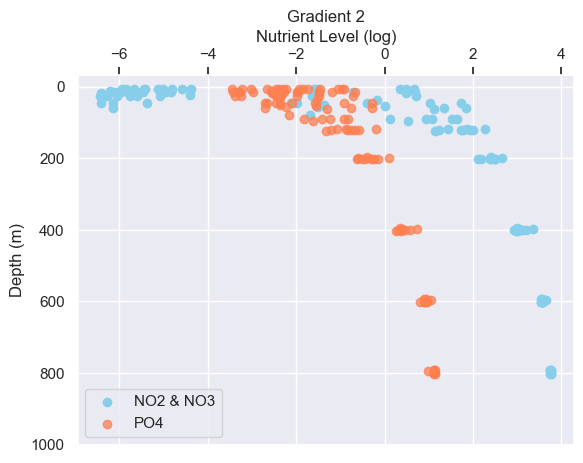

In [5]:
g2_no2_no3 = np.log(g2nutrient_data['NO3_NO2'].to_list())
g2_po4 = np.log(g2nutrient_data['PO4'].to_list())
g2nutrient_depth = g2nutrient_data['depth'].to_list()
g2nutrient_lat = g2nutrient_data['lat'].to_list()

plt.scatter(g2_no2_no3, g2nutrient_depth, alpha = 1.0, color = 'skyblue', label = 'NO2 & NO3')
plt.scatter(g2_po4, g2nutrient_depth, alpha = 0.75, color = 'coral', label = 'PO4')
plt.xlabel('Nutrient Level (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 2')
plt.gca().invert_yaxis()
plt.ylim(bottom = 1000)
plt.legend()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

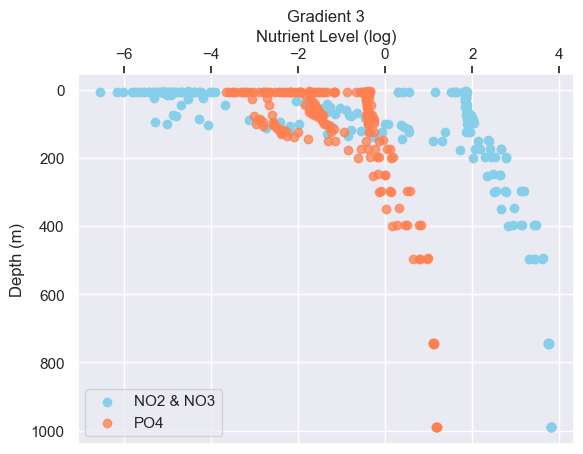

In [6]:
g3_no2_no3 = np.log(g3nutrient_data['NO3_plus_NO2'].to_list())
g3_po4 = np.log(g3nutrient_data['PO4'].to_list())
g3nutrient_depth = g3nutrient_data['depth'].to_list()
g3nutrient_lat = g3nutrient_data['lat'].to_list()

plt.scatter(g3_no2_no3, g3nutrient_depth, alpha = 1.0, color = 'skyblue', label = 'NO2 & NO3')
plt.scatter(g3_po4, g3nutrient_depth, alpha = 0.75, color = 'coral', label = 'PO4')
plt.xlabel('Nutrient Level (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 3')
plt.gca().invert_yaxis()
plt.legend()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

In [7]:
# Cleaning up dataframes with NaN values, fidning unique lats, and sorting them for gradients 1-3
g1no2_no3 = g1nutrient_data.dropna(subset = ['NO3_NO2'])
g1_no2no3_lats = g1no2_no3['rlat'].unique()
g1_no2no3_lats = np.sort(g1_no2no3_lats)

g2no2_no3 = g2nutrient_data.dropna(subset = ['NO3_NO2'])
g2_no2no3_lats = g2no2_no3['rlat'].unique()
g2_no2no3_lats = np.sort(g2_no2no3_lats)

g3no2_no3 = g3nutrient_data.dropna(subset = ['NO3_plus_NO2'])
g3_no2no3_lats = g3no2_no3['rlat'].unique()
g3_no2no3_lats = np.sort(g3_no2no3_lats)

# Combining the lats for the NO2 + NO3 data for G1, G2, and G3
all_no2no3_lats = np.concatenate((g1_no2no3_lats, g2_no2no3_lats, g3_no2no3_lats))
all_uni_no2no3_lats = np.unique(all_no2no3_lats)
all_uni_no2no3_lats = np.sort(all_uni_no2no3_lats)

# Create a color palette with enough colors for each unique latitude
no2no3_palette = sns.color_palette("viridis", n_colors = len(all_uni_no2no3_lats))

# Create a dictionary to map each latitude to a unique color
no2no3_lat_color_map = {lat: no2no3_palette[i] for i, lat in enumerate(all_uni_no2no3_lats)}

C:\Users\User\AppData\Local\Temp\ipykernel_15516\183927789.py:4: RuntimeWarning: divide by zero encountered in log
  no2_no3 = np.log(nutrient_df['NO3_NO2'].to_list())
C:\Users\User\AppData\Local\Temp\ipykernel_15516\183927789.py:4: RuntimeWarning: divide by zero encountered in log
  no2_no3 = np.log(nutrient_df['NO3_NO2'].to_list())


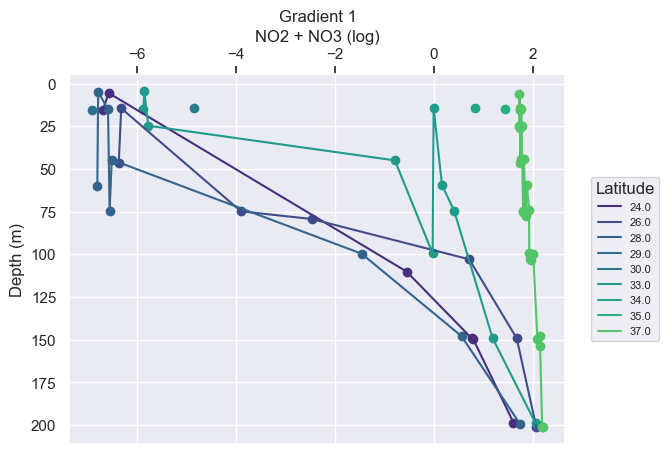

In [9]:
for lat in g1_no2no3_lats:
    nutrient_df = g1no2_no3.loc[g1no2_no3['rlat'] == lat]
    depth = nutrient_df['depth'].to_list()
    no2_no3 = np.log(nutrient_df['NO3_NO2'].to_list())
    sns.lineplot(data = nutrient_df, x = no2_no3, y = depth, color = no2no3_lat_color_map[lat], label = lat)
    plt.scatter(no2_no3, depth, color = no2no3_lat_color_map[lat])
    
# Graph cosmetics
plt.xlabel('NO2 + NO3 (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 1')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

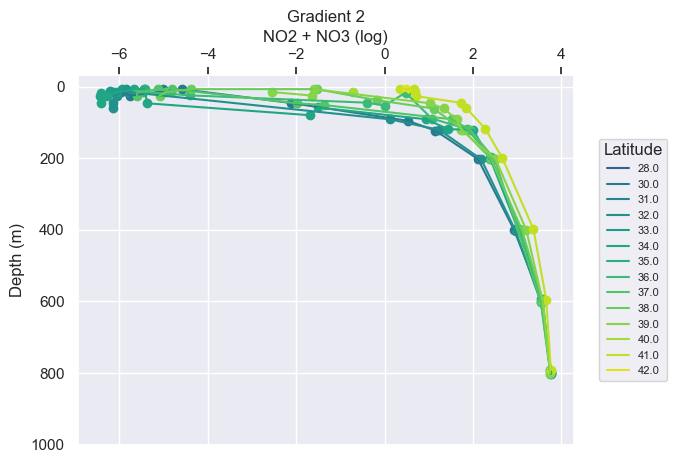

In [10]:
for lat in g2_no2no3_lats:
    nutrient_df = g2no2_no3.loc[g2no2_no3['rlat'] == lat]
    depth = nutrient_df['depth'].to_list()
    no2_no3 = np.log(nutrient_df['NO3_NO2'].to_list())
    sns.lineplot(data = nutrient_df, x = no2_no3, y = depth, color = no2no3_lat_color_map[lat], label = lat)
    plt.scatter(no2_no3, depth, color = no2no3_lat_color_map[lat])

# Graph cosmetics
plt.xlabel('NO2 + NO3 (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 2')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
plt.gca().invert_yaxis()
plt.ylim(bottom = 1000)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

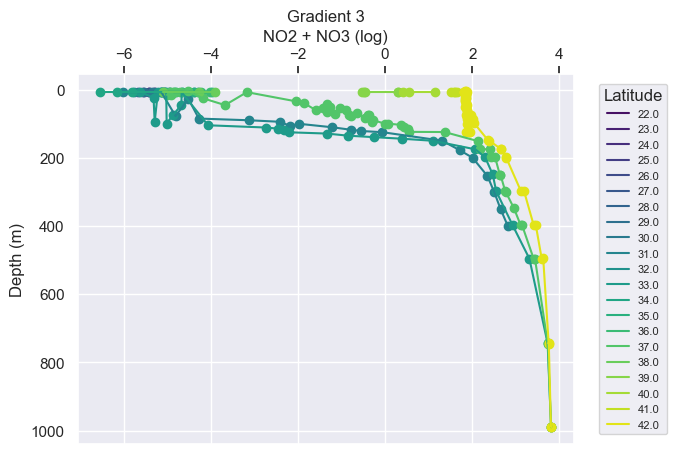

In [11]:
for lat in g3_no2no3_lats:
    nutrient_df = g3no2_no3.loc[g3no2_no3['rlat'] == lat]
    depth = nutrient_df['depth'].to_list()
    no2_no3 = np.log(nutrient_df['NO3_plus_NO2'].to_list())
    sns.lineplot(data = nutrient_df, x = no2_no3, y = depth, color = no2no3_lat_color_map[lat], label = lat)
    plt.scatter(no2_no3, depth, color = no2no3_lat_color_map[lat])

# Graph cosmetics
plt.xlabel('NO2 + NO3 (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 3')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

In [12]:
# Cleaning up dataframes with NaN values, fidning unique lats, and sorting them for gradients 1-3
g1po4 = g1nutrient_data.dropna(subset = ['PO4'])
g1_po4_lats = g1po4['rlat'].unique()
g1_po4_lats = np.sort(g1_po4_lats)

g2po4 = g2nutrient_data.dropna(subset = ['PO4'])
g2_po4_lats = g2po4['rlat'].unique()
g2_po4_lats = np.sort(g2_po4_lats)

g3po4 = g3nutrient_data.dropna(subset = ['PO4'])
g3_po4_lats = g3po4['rlat'].unique()
g3_po4_lats = np.sort(g3_po4_lats)

# Combining the lats for the PO4 data for G1, G2, and G3
all_po4_lats = np.concatenate((g1_po4_lats, g2_po4_lats, g3_po4_lats))
all_uni_po4_lats = np.unique(all_po4_lats)
all_uni_po4_lats = np.sort(all_uni_po4_lats)

# Create a color palette with enough colors for each unique latitude
po4_palette = sns.color_palette("viridis", n_colors = len(all_uni_po4_lats))

# Create a dictionary to map each latitude to a unique color
po4_lat_color_map = {lat: po4_palette[i] for i, lat in enumerate(all_uni_po4_lats)}

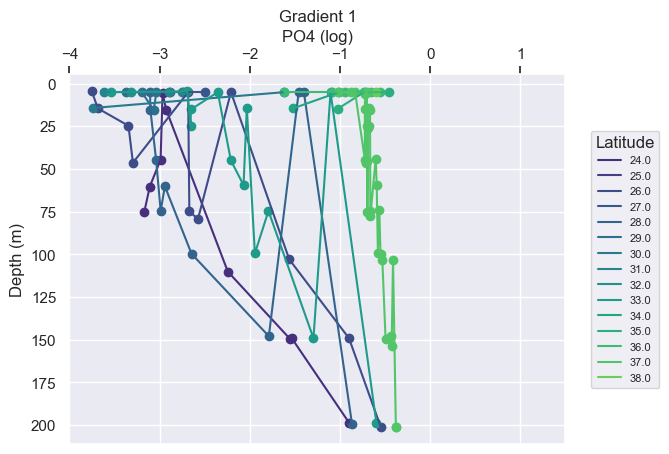

In [13]:
for lat in g1_po4_lats:
    nutrient_df = g1po4.loc[g1po4['rlat'] == lat]
    nutrient_df = nutrient_df.sort_values(by = 'depth', ascending = True)
    depth = nutrient_df['depth'].to_list()
    po4 = np.log(nutrient_df['PO4'].to_list())
    sns.lineplot(data = nutrient_df, x = po4, y = depth, color = po4_lat_color_map[lat], label = lat)
    plt.scatter(po4, depth, color = po4_lat_color_map[lat])

# Graph cosmetics
plt.xlabel('PO4 (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 1')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
plt.gca().invert_yaxis()
plt.xlim(-4, 1.5)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

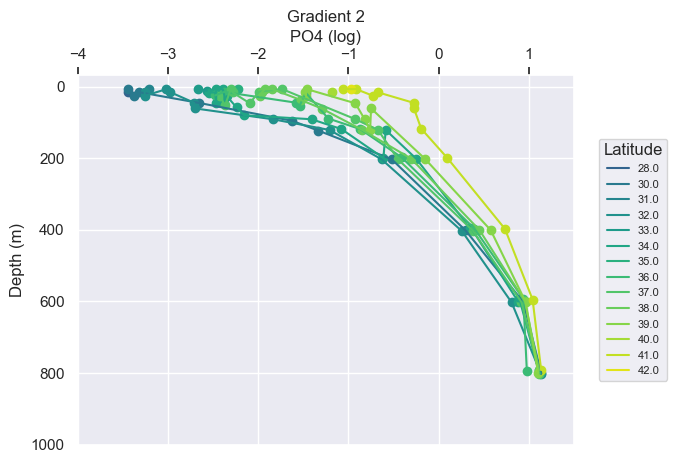

In [14]:
for lat in g2_po4_lats:
    nutrient_df = g2po4.loc[g2po4['rlat'] == lat]
    nutrient_df = nutrient_df.sort_values(by = 'depth', ascending = True)
    depth = nutrient_df['depth'].to_list()
    po4 = np.log(nutrient_df['PO4'].to_list())
    sns.lineplot(data = nutrient_df, x = po4, y = depth, color = po4_lat_color_map[lat], label = lat)
    plt.scatter(po4, depth, color = po4_lat_color_map[lat])

# Graph cosmetics
plt.xlabel('PO4 (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 2')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
plt.gca().invert_yaxis()
plt.ylim(bottom = 1000)
plt.xlim(-4, 1.5)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

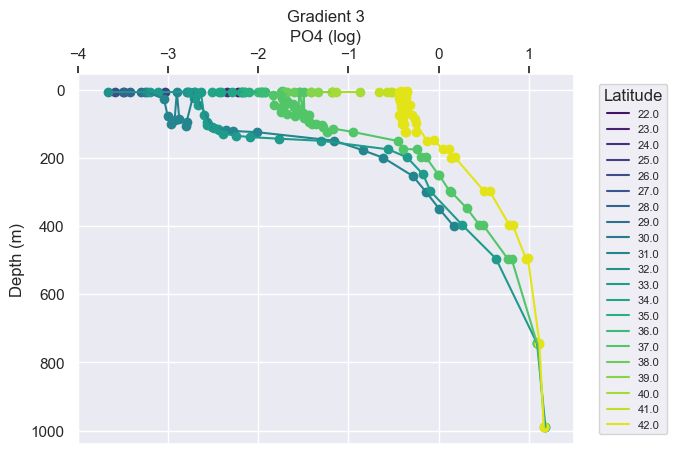

In [15]:
for lat in g3_po4_lats:
    nutrient_df = g3po4.loc[g3po4['rlat'] == lat]
    nutrient_df = nutrient_df.sort_values(by = 'depth', ascending = True)
    depth = nutrient_df['depth'].to_list()
    po4 = np.log(nutrient_df['PO4'].to_list())
    sns.lineplot(data = nutrient_df, x = po4, y = depth, color = po4_lat_color_map[lat], label = lat)
    plt.scatter(po4, depth, color = po4_lat_color_map[lat])

# Graph cosmetics
plt.xlabel('PO4 (log)')
plt.ylabel('Depth (m)')
plt.title('Gradient 3')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
plt.gca().invert_yaxis()
plt.xlim(-4, 1.5)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

In [17]:
# rounding the trace metals lats in g1, g2, and g3
g1_m_round_lat = g1_metals['lat'].round()
g1_metals.insert(2, 'rlat', g1_m_round_lat)

g2_m_round_lat = g2_metals['lat'].round()
g2_metals.insert(2, 'rlat', g2_m_round_lat)

g3_m_round_lat = g3_metals['lat'].round()
g3_metals.insert(2, 'rlat', g3_m_round_lat)

In [18]:
# Cleaning up metal dataframe with NaN values, finding unique lats, sorting the lats
g1metal_data = g1_metals.dropna(subset = ['Fe_dissolved'])
g1metal_lats = g1_metals['rlat'].unique()
g1metal_lats = np.sort(g1metal_lats)

g2metal_data = g2_metals.dropna(subset = ['Fe_dissolved'])
g2metal_lats = g2metal_data['rlat'].unique()
g2metal_lats = np.sort(g2metal_lats)

g3metal_data = g3_metals.dropna(subset = ['Fe_dissolved'])
g3metal_lats = g3_metals['rlat'].unique()
g3metal_lats = np.sort(g3metal_lats)

# Combining the lats for the PO4 data for G1, G2, and G3
all_metal_lats = np.concatenate((g1metal_lats, g2metal_lats, g3metal_lats))
all_uni_metal_lats = np.unique(all_metal_lats)
all_uni_metal_lats = np.sort(all_uni_metal_lats)

# Create a color palette with enough colors for each unique latitude
metal_palette = sns.color_palette("viridis", n_colors = len(all_uni_metal_lats))

# Create a dictionary to map each latitude to a unique color
metal_lat_color_map = {lat: metal_palette[i] for i, lat in enumerate(all_uni_metal_lats)}

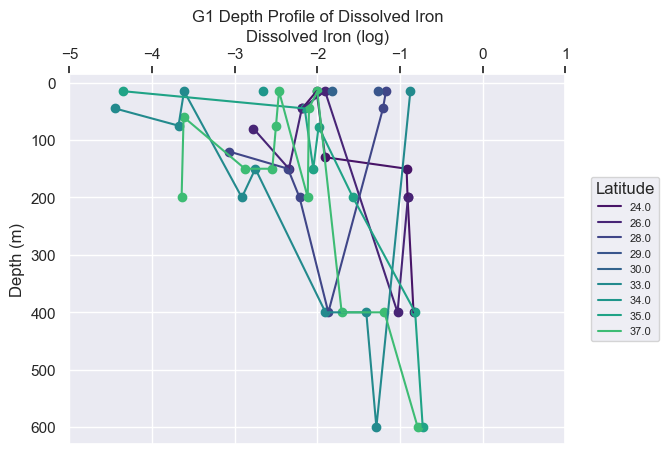

In [19]:
for lat in g1metal_lats:
    metal_df = g1_metals.loc[g1_metals['rlat'] == lat]
    metal_df = metal_df.sort_values(by = 'depth', ascending = True)
    depth = metal_df['depth'].to_list()
    iron = np.log(metal_df['Fe_dissolved'].to_list())
    sns.lineplot(data = metal_df, x = iron, y = depth, color = metal_lat_color_map[lat], label = lat)
    plt.scatter(iron, depth, color = metal_lat_color_map[lat])

plt.title('G1 Depth Profile of Dissolved Iron')
plt.xlabel('Dissolved Iron (log)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.xlim(-5, 1)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')

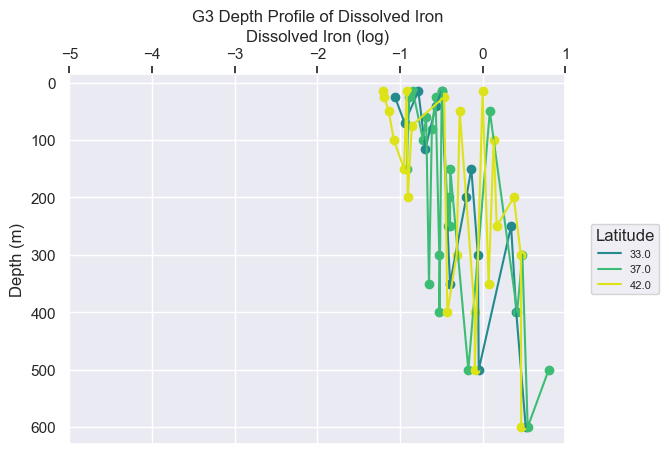

In [20]:
for lat in g3metal_lats:
    metal_df = g3_metals.loc[g3_metals['rlat'] == lat]
    metal_df = metal_df.sort_values(by = 'depth', ascending = True)
    depth = metal_df['depth'].to_list()
    iron = np.log(metal_df['Fe_dissolved'].to_list())
    sns.lineplot(data = metal_df, x = iron, y = depth, color = metal_lat_color_map[lat], label = lat)
    plt.scatter(iron, depth, color = metal_lat_color_map[lat])

plt.title('G3 Depth Profile of Dissolved Iron')
plt.xlabel('Dissolved Iron (log)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.xlim(-5, 1)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')

Text(0, 0.5, 'Dissolved Iron (log)')

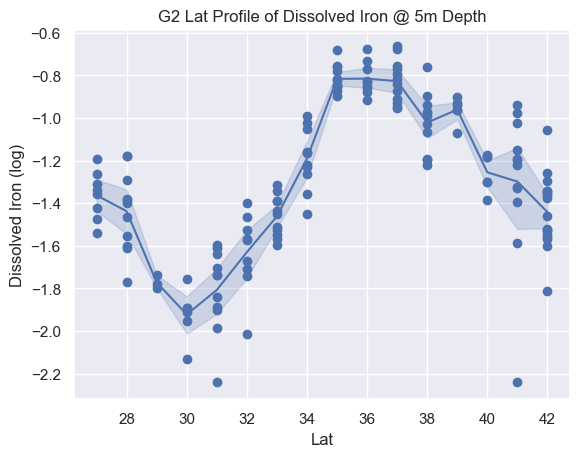

In [21]:
g2metal_data # already got rid of NaN values
g2_r_lats = g2metal_data['rlat'].to_list()
g2_iron = np.log(g2metal_data['Fe_dissolved'].to_list())
sns.lineplot(data = g2metal_data, x = g2_r_lats, y = g2_iron)
plt.scatter(g2_r_lats, g2_iron)

plt.title('G2 Lat Profile of Dissolved Iron @ 5m Depth')
plt.xlabel('Lat')
plt.ylabel('Dissolved Iron (log)')